# Introduction

In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

In [2]:
!kaggle datasets list -s amazon

ref                                                    title                                         size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
snap/amazon-fine-food-reviews                          Amazon Fine Food Reviews                     242MB  2017-05-01 18:51:31         125092       1892  0.7941176        
kritanjalijain/amazon-reviews                          Amazon reviews                                 1GB  2021-05-15 09:45:40           3824         63  1.0              
sid321axn/amazon-alexa-reviews                         Amazon Alexa Reviews                         164KB  2018-07-31 17:45:14          16425        242  0.8235294        
eswarchandt/amazon-music-reviews                       Amazon Musical Instruments Reviews             5MB  2020-03-29 02:59:52          1084

In [3]:
!kaggle datasets download -d snap/amazon-fine-food-reviews

100%|███████████████████████████████████████▉| 242M/242M [00:11<00:00, 25.4MB/s]
100%|████████████████████████████████████████| 242M/242M [00:11<00:00, 21.2MB/s]


In [4]:
!mkdir -p data/amazon
!unzip amazon-fine-food-reviews.zip -d data/amazon

Archive:  amazon-fine-food-reviews.zip
  inflating: data/amazon/Reviews.csv  
  inflating: data/amazon/database.sqlite  
  inflating: data/amazon/hashes.txt  


In [76]:
import pandas as pd
#load the data
sample=pd.read_csv("data/amazon/Reviews.csv")

In [78]:
sample = sample.groupby('Score', group_keys=False).apply(lambda x: x.sample(frac=0.1))

In [79]:
#check the loaded data
print(sample.shape)

(56846, 10)


In [80]:
#look of the dataset
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
268614,268615,B004SRFYMK,A36X8R1Y6NREHY,S. H.,0,0,1,1349222400,Tastes like plastic-YUCK!,Have purchased this product in different citie...
68237,68238,B003EM7J9Q,A1LPQ97WUIAIKV,Robert V. Boston,9,10,1,1235779200,Hard To Cook,I don't know if I got a bad batch or something...
5958,5959,B001O2IX8E,A3KDZCQ82JFWLN,Phoebe Oh,0,1,1,1245888000,Some broken jars,When I saw some of the Earth's Best jars offer...
522614,522615,B007TJGZ0Y,A2V9VS4VWCSCNK,A. Shibley,0,0,1,1349222400,Really don't get the rave reviews. Tastes like...,I made the mistake of buying a 50 pack of thes...
26686,26687,B000YSS7EO,AUECOTLRQLGJH,KarTerz,2,3,1,1259020800,Smells stale,I love this brand and my baby loves the oatmea...


/home/bruno/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

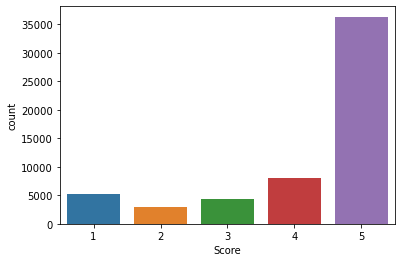

In [81]:
# Understand how customer ratings are distributed
import seaborn as sns
sns.countplot(sample.Score)

 # Data Cleaning

In [82]:
#converting the Numerical reviws to categorical reviews on codition above 3 are
#positive and below 3 are negative as reviews rating with 3 are not much useful
#for analysis

#function
def partition(x):
    if x < 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = sample['Score']
positiveNegative = actualScore.map(partition) 
sample['Score'] = positiveNegative

In [97]:
sample.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
268614,268615,B004SRFYMK,A36X8R1Y6NREHY,S. H.,0,0,negative,1349222400,Tastes like plastic-YUCK!,Have purchased this product in different citie...
68237,68238,B003EM7J9Q,A1LPQ97WUIAIKV,Robert V. Boston,9,10,negative,1235779200,Hard To Cook,I don't know if I got a bad batch or something...
5958,5959,B001O2IX8E,A3KDZCQ82JFWLN,Phoebe Oh,0,1,negative,1245888000,Some broken jars,When I saw some of the Earth's Best jars offer...
522614,522615,B007TJGZ0Y,A2V9VS4VWCSCNK,A. Shibley,0,0,negative,1349222400,Really don't get the rave reviews. Tastes like...,I made the mistake of buying a 50 pack of thes...
26686,26687,B000YSS7EO,AUECOTLRQLGJH,KarTerz,2,3,negative,1259020800,Smells stale,I love this brand and my baby loves the oatmea...


In [98]:
# no of positive and negative reviews
sample["Score"].value_counts()
#here we can say it is a unbalanced data set

positive    48642
negative     8204
Name: Score, dtype: int64

In [99]:
#dropping  the duplicates column if any using drop duplicates from pandas
sorted_data=sample.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(52151, 10)

In [100]:
# no duplicate columns found
(final['Id'].size*1.0)/(sample['Id'].size*1.0)*100

91.74084368293283

In [101]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
# Help..Num is always less than Denom.. as Denom is people who upvote and donwvote
#Before understanding text preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

# after removing duplicate rows we found, 8346 positive and 1457 negative

(52151, 10)


positive    44680
negative     7471
Name: Score, dtype: int64

/home/bruno/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='count'>

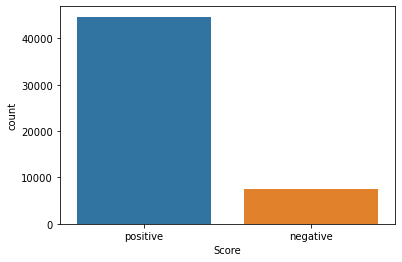

In [102]:
# After Removing Duplicate rows
import seaborn as sns
sns.countplot(final.Score)

# Text Processing

To make the text clean by removing HTML tag reviews, stopwords to segregate and adding timestamp

In [103]:
# find sentences containing HTML tags
import re
i=0;
for sent in final['Text'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

3
This product is a real bargain, considering the fact that dogs love liver. I've used this as an addition to another dog treat product I use for my dog. My dog goes nuts when he knows that he's about to be rewarded with<br />Pro-Treat Beef Liver treats. The instructions advise to give 2-3 pieces per day when using. At this rate, the container will last you a good while. The product itself is very fresh and the pieces are all of various sizes and thickness. Average size of treat is small rectangular pieces of different thickness. They're easy to break into smaller pieces if necessary. My Springer Spaniel pup is 5 months old and he just loves these. I tried this product on my girlfriend's 10 yr old teacup Poodle, who is pretty slow at this point in her life. She absolutely came to life and jumped all over the place for a taste of one of these treats. Buy it....your dog will love it!


In [104]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer which is developed in recent years
stop=set(stopwords.words('english'))

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'can', 'yourselves', 'of', 'here', 'being', 'again', 'my', 'shouldn', 'as', 'why', "it's", 'are', 'more', 'theirs', 'because', 'until', 'above', 'now', 'what', 'other', "mustn't", 'his', 'were', 'on', 'over', 'each', 'with', 'them', 'or', 'under', 'yourself', 'hadn', 'from', 'ma', 'themselves', "she's", 'their', "you've", 'few', 'an', 'mustn', 'that', 'out', 'all', 'has', 'very', "didn't", 'be', 'nor', 'o', 'won', 'our', 'further', "doesn't", 'own', 'it', 'just', 'such', 'didn', 'isn', 'but', 'into', 'not', "don't", 'wouldn', 'they', 'no', 'before', 'both', 'her', 'doesn', 'so', 'him', 'she', "aren't", 'its', 'by', 'your', 'then', 'if', 'should', 'some', "shouldn't", 'd', 'a', "wasn't", 'about', 'any', "should've", 'am', "hasn't", 'was', 'weren', 'to', 'have', 'mightn', 'this', 'than', 'most', "you'll", "haven't", 'herself', 'once', 'between', 'been', 'there', 'ain', 'same', "hadn't", 'up', 'll', 'during', 'through', 'me', 'whom', 'you', "isn't", 'itself', 'couldn', 's', "weren't", 'i

[nltk_data] Downloading package stopwords to /home/bruno/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
from tqdm import tqdm

In [106]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in tqdm(final['Text'].values):
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

100%|███████████████████████████████████| 52151/52151 [00:34<00:00, 1494.75it/s]


In [107]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")

In [108]:
final.shape 

(52151, 11)

In [109]:
data_pos = final[final["Score"] == "positive"]
data_neg = final[final["Score"] == "negative"]
final = pd.concat([data_pos, data_neg])
score =final["Score"]
final.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
150515,150516,0006641040,A3OI7ZGH6WZJ5G,"Mary Jane Rogers ""Maedchen""",0,0,positive,1293840000,Darling!,"The same author wrote ""Where the Wild Things A...",author wrote wild thing carol king wrote great...
171157,171158,7310172001,A223KNNTFHHIM7,Silkworm,0,0,positive,1232150400,Great product,These liver treats are great for training. We ...,liver treat great train adopt german shepherd ...
171158,171159,7310172001,A16GY2RCF410DT,LB,0,0,positive,1231718400,Great!,My dog loves these treats! We started using t...,dog love treat start use train purpos treat he...
171215,171216,7310172001,A3084RD2YNXRXJ,John L. Gonzales,1,1,positive,1267574400,Rolls Royce of dog treats.......,"This product is a real bargain, considering th...",product real bargain consid fact dog love live...
171136,171137,7310172001,A38H80FBUIF8I3,"Bryan Kelly ""bk""",0,0,positive,1269302400,Amazing Training Treat!!,I have tried several different kinds of traini...,tri sever differ kind train treat pet store ei...


In [110]:

final["Time"] = pd.to_datetime(final["Time"], unit = "s")
final= final.sort_values(by = "Time")
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
451854,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,2000-01-03,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...
374421,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,positive,2000-01-09,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,one movi movi collect fill comedi action whate...
451863,451864,B00004CXX9,A1B2IZU1JLZA6,Wes,19,23,negative,2000-01-19,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",alway enjoy movi funni entertain didnt hesit p...
1244,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,2000-06-23,Great Product,This was a really good idea and the final prod...,realli good idea final product outstand use de...
451975,451976,B00004CXX9,A3K3YJWV0N54ZO,Joey,2,3,positive,2001-09-24,"Beetlejuice is a greatmovie, but they cheated ...",Just to warn you. when in trying to trick you ...,warn tri trick widescreen format compani made ...


#  Clustering


### K means using bag of words

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
count_vect = TfidfVectorizer()
bow = count_vect.fit_transform(final['CleanedText'].values)
bow.shape

(52151, 27380)

In [115]:
bow

<52151x27380 sparse matrix of type '<class 'numpy.float64'>'
	with 1654786 stored elements in Compressed Sparse Row format>

In [119]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10,init='k-means++',random_state=99)
model.fit(bow)

KMeans(n_clusters=10, random_state=99)

In [122]:
df = final
df["Tfidf Clus Label"] = model.labels_ # the last column you can see the label numebers
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Bow Clus Label,Tfidf Clus Label
451854,451855,B00004CXX9,AJH6LUC1UT1ON,The Phantom of the Opera,0,0,positive,2000-01-03,FANTASTIC!,Beetlejuice is an excellent and funny movie. K...,beetlejuic excel funni movi keaton hilari wack...,2,2
374421,374422,B00004CI84,A1048CYU0OV4O8,Judy L. Eans,2,2,positive,2000-01-09,GREAT,THIS IS ONE MOVIE THAT SHOULD BE IN YOUR MOVIE...,one movi movi collect fill comedi action whate...,2,2


In [125]:
# visually how points or reviews are distributed across 10 clusters 
import matplotlib.pyplot as plt

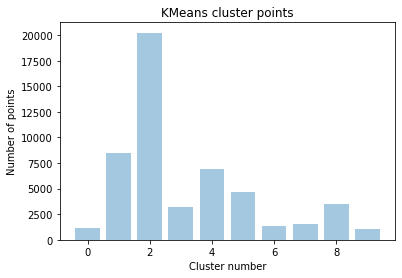

In [127]:
plt.bar([x for x in range(10)], df.groupby(['Tfidf Clus Label'])['Text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [129]:
terms1 = tfidf_vect.get_feature_names()

/home/bruno/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [130]:
terms1[1:10]

['aaa',
 'aaaa',
 'aaaaaaarrrrrggghhh',
 'aaaah',
 'aaaallll',
 'aaaand',
 'aaahhhhhh',
 'aachen',
 'aadd']

In [134]:
df1.groupby(['Tfidf Clus Label'])['Text'].count()

Tfidf Clus Label
0     1175
1     8462
2    20232
3     3216
4     6946
5     4701
6     1345
7     1508
8     3463
9     1103
Name: Text, dtype: int64

In [136]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: cooke
 chocmod
 tabl
 loriva
 liesur
 glutamin
 golosina
 greatesti
 freebe
 dysfunct
Cluster 1: tabl
 liesur
 flatten
 golosina
 dragonfli
 chocmod
 vivid
 stroe
 tooooooooooo
 superautomat
Cluster 2: unmil
 loriva
 greatesti
 pretens
 golosina
 oilyyyyyy
 magnif
 liesur
 flatten
 tabl
Cluster 3: talbott
 greem
 dragonfli
 flatten
 tabl
 balitmor
 liesur
 golosina
 greatesti
 loriva
Cluster 4: amazinggrass
 predecessor
 oomplet
 pretens
 statist
 filo
 greatesti
 byrd
 seven
 livng
Cluster 5: cofee
 csb
 flatten
 liesur
 tabl
 stickler
 golosina
 rhapsodi
 bonnat
 greatesti
Cluster 6: barolo
 chocmod
 tabl
 sleepov
 proced
 liesur
 golosina
 dysfunct
 oilyyyyyy
 greatesti
Cluster 7: caterpillar
 fontera
 dysfunct
 loriva
 liesur
 tomthi
 candl
 oilyyyyyy
 favor
 chief
Cluster 8: diva
 tomthi
 fontera
 loriva
 chex
 dysfunct
 gerkhin
 oilyyyyyy
 liesur
 pretens
Cluster 9: chipotl
 pom
 balitmor
 flatten
 liesur
 tabl
 rusk
 sleepov
 loriva
 greatesti


# Average Word to Vector

In [138]:
final.shape

(52151, 13)

In [152]:
final = final.groupby('Score', group_keys=False).apply(lambda x: x.sample(frac=0.1))

In [153]:
i=0
list_of_sent=[]
for sent in final['CleanedText'].values:
    list_of_sent.append(sent.split())

In [154]:
print(final['CleanedText'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

read review walnut amazon com also order one packag senior like order packag sent friend differ citi everyon like baklawa howev last week decid order packag baklawa baklava pistachio believ bodi like would think stuff good stuff made pistachio wastag money feel sorri spend doller poor qualiti product without tast dont know pistachio use product low qualiti problem
*****************************************************************
['read', 'review', 'walnut', 'amazon', 'com', 'also', 'order', 'one', 'packag', 'senior', 'like', 'order', 'packag', 'sent', 'friend', 'differ', 'citi', 'everyon', 'like', 'baklawa', 'howev', 'last', 'week', 'decid', 'order', 'packag', 'baklawa', 'baklava', 'pistachio', 'believ', 'bodi', 'like', 'would', 'think', 'stuff', 'good', 'stuff', 'made', 'pistachio', 'wastag', 'money', 'feel', 'sorri', 'spend', 'doller', 'poor', 'qualiti', 'product', 'without', 'tast', 'dont', 'know', 'pistachio', 'use', 'product', 'low', 'qualiti', 'problem']


In [155]:

import re
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [156]:
i=0
list_of_sent_train=[]
for sent in final['CleanedText'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent_train.append(filtered_sentence)

In [157]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent_train,vector_size=100, workers=4)

In [158]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in tqdm(list_of_sent_train): # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape


100%|█████████████████████████████████████| 5215/5215 [00:00<00:00, 9994.74it/s]


(5215, 100)

In [159]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
distance_array = pairwise_distances(sent_vectors, metric='cosine')

In [161]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.6, min_samples=2).fit(distance_array)

In [162]:
clustering.labels_


array([ 0,  0,  0, ...,  0,  0, 31])

In [164]:
df = final
df['w2v Clus Label'] = clustering.labels_ # the last column you can see the label numebers
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,Bow Clus Label,Tfidf Clus Label,w2v Clus Label
551643,551644,B0002HDM0Q,A3MPN3PLR87EC,Sardar N. Khan,7,10,negative,2006-07-06,very poor quality stuff,After reading reviews about Baklawa-w/Walnuts ...,read review walnut amazon com also order one p...,0,4,0
375433,375434,B000EITV3K,A25ZI768DV2K8S,Denise M. Ostmeyer,1,2,negative,2009-09-16,Not that Great,I really wouldn't recommend these to my friend...,realli wouldnt recommend friend realli look so...,0,0,0


In [165]:
df.groupby(['w2v Clus Label'])['Text'].count()

w2v Clus Label
-1      133
 0     4962
 1        9
 2        2
 3        2
 4        2
 5       21
 6        3
 7        6
 8        9
 9        2
 10       3
 11       3
 12       3
 13       2
 14       3
 15       2
 16       2
 17       3
 18       3
 19       2
 20       2
 21       6
 22       2
 23       2
 24       5
 25       3
 26       2
 27       2
 28       4
 29       2
 30       2
 31       2
 32       2
 33       2
Name: Text, dtype: int64

In [166]:
df[df['w2v Clus Label'] == -1]["Text"].values

array(["I ordered two boxes of 12 cans each.  Amazon poorly protects this product in shipping.  Of the 24 cans, 9 of them were dented and damaged, some in each box.  I've ordered canned items one other time and got the same results.  So I had decided not to mail order canned food again.  Well, I did.  This time, I've learned my lesson.  Dented up cans risk being compromised.",
       'This coffee is nothing like I expected coffee so weak it looks like tea.  It taste like I am drinking water with sugar (if I add sugar)',
       'This "cappuccino" doesn\'t taste good at all! DO NOT BUY, and will never buy again. I would not recommend this product to anyone.',
       'This product is not environmentally sensitive ... you will put it in the trash after one cup. Thus, thousands of years from now, your mistake will endure!!',
       'I can get this at my local grocery store for $2.69 per can ($32.28 for 12).',
       "I bought this food thinking my dog, Jake, would like it.  It has wonderful

In [167]:
df[df['w2v Clus Label'] == 0]["Text"].values

array(["After reading reviews about Baklawa-w/Walnuts in amazon.com, I also ordered for one package, my seniors and co-workers liked it. I ordered for 3 more packages that were sent out to my friends in different cities, everyone liked this Baklawa. However last week, I decided to order for 2 packages of Baklawa (Baklava) w/Pistachios, believe me no body liked it.You would think that this stuff should be as good as other stuffs made of Pistachios,but no way--just a wastage of money. I feel sorry for spending about 35 dollers on this poor quality product without any taste.I don't know if the pistachios used in this product is of low quality or what is the problem??.",
       "I really wouldn't recommend these to my friends. I was really looking for something that actually tasted like a chocolate chococolate chip cookie. Just didn't like them.....Sorry",
       'It is such a shame that my 4 dogs loved the Taste of the Wild dog food and it was recalled due to the salmonella infected produ

In [168]:
df[df['w2v Clus Label'] == -1]["Score"].value_counts()

positive    124
negative      9
Name: Score, dtype: int64

In [169]:
df[df['w2v Clus Label'] == 0]["Score"].value_counts()

positive    4234
negative     728
Name: Score, dtype: int64

In [170]:
df[df['w2v Clus Label'] == 2]["Score"].value_counts()

negative    1
positive    1
Name: Score, dtype: int64